In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
df = pd.read_csv('fish.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


C:\Users\jensm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


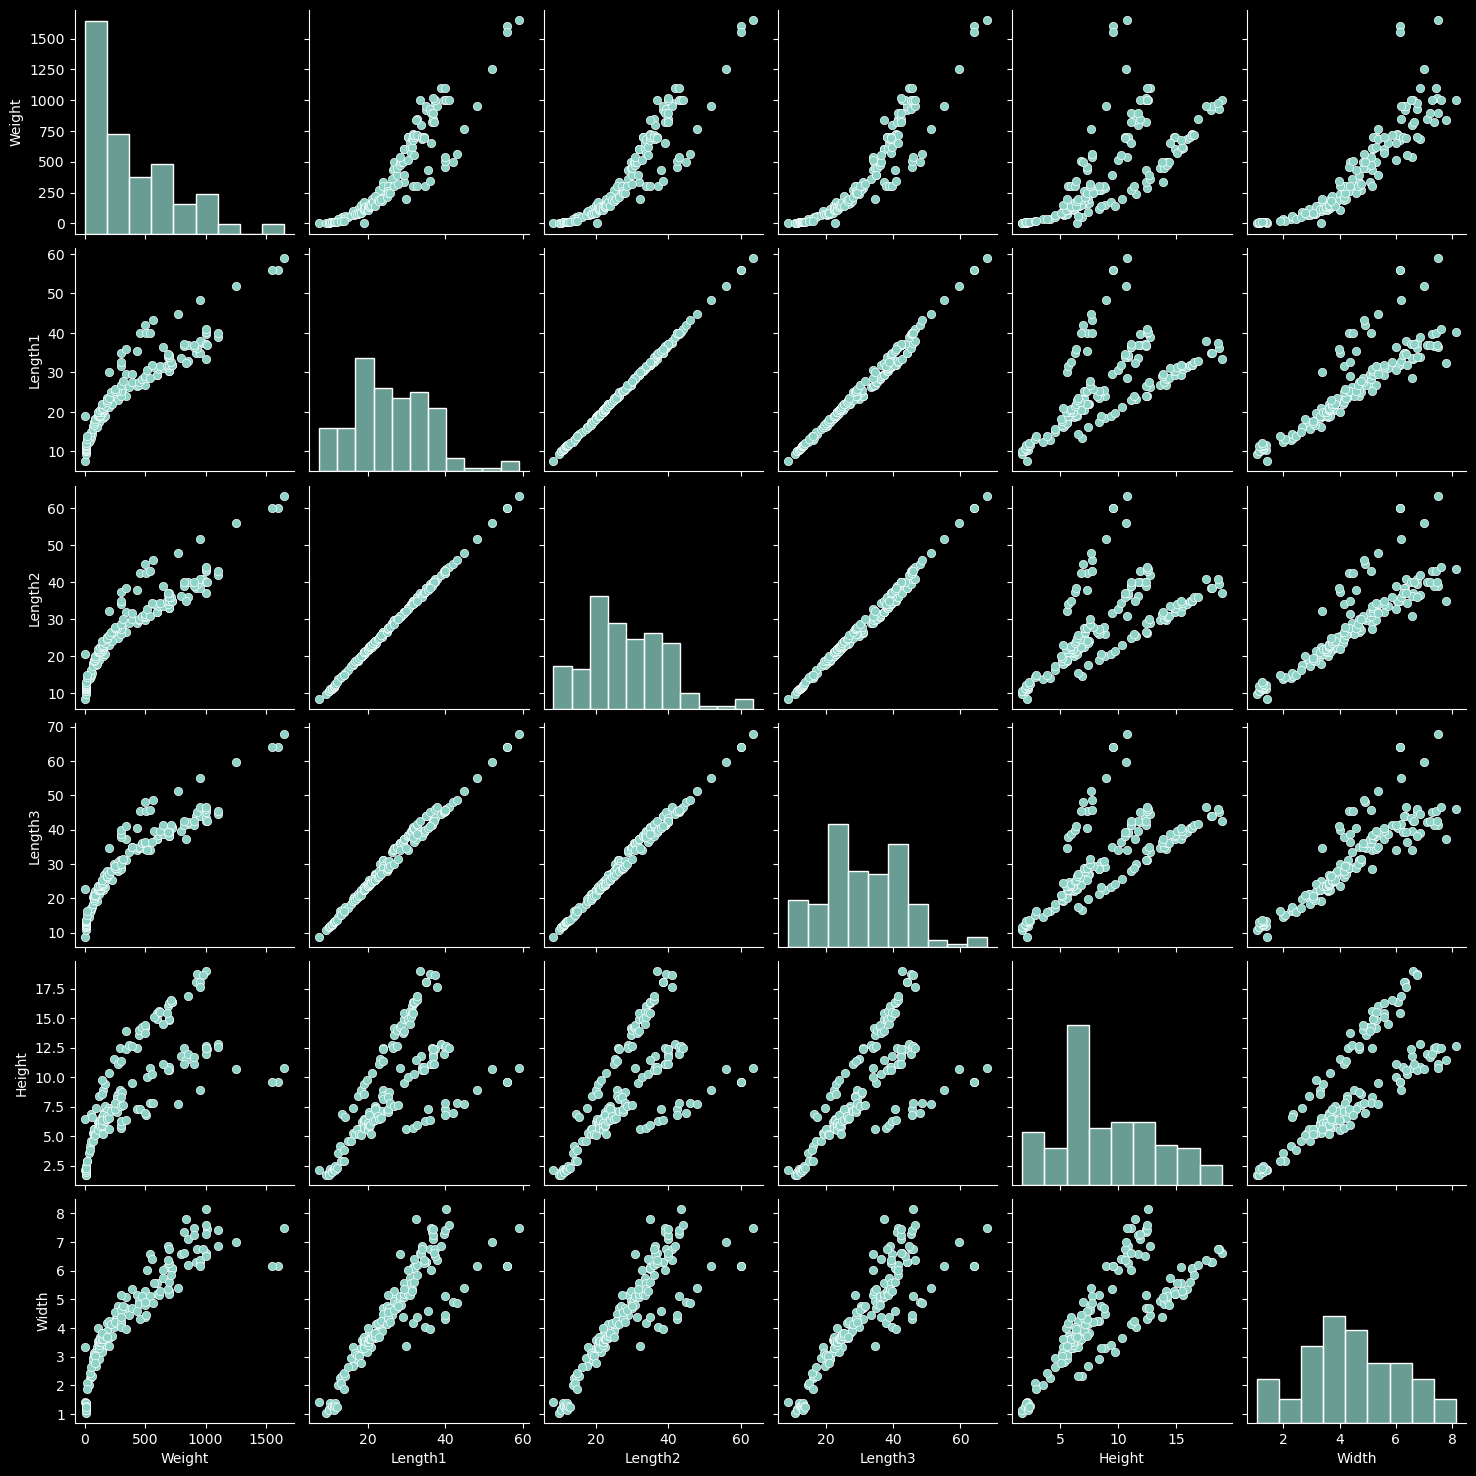

In [4]:
seaborn.pairplot(df)

In [5]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [6]:
X_df = df.loc[:, 'Length1':'Width']
y_s = df.loc[:, 'Weight']
X_df

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [7]:
all([X_df.iloc[0, 0] == df.iloc[0, 2], y_s[0] == df.iloc[0, 1]])

True

In [8]:
X = X_df.values; y = y_s.values

In [9]:
X.shape, y.shape

((159, 5), (159,))

In [10]:
y = y.reshape(y.shape[0], 1)
y[:5]

array([[242.],
       [290.],
       [340.],
       [363.],
       [430.]])

In [11]:
X[0], y[0][0]

(array([23.2 , 25.4 , 30.  , 11.52,  4.02]), 242.0)

In [12]:
df.loc[0]

Species    Bream
Weight     242.0
Length1     23.2
Length2     25.4
Length3     30.0
Height     11.52
Width       4.02
Name: 0, dtype: object

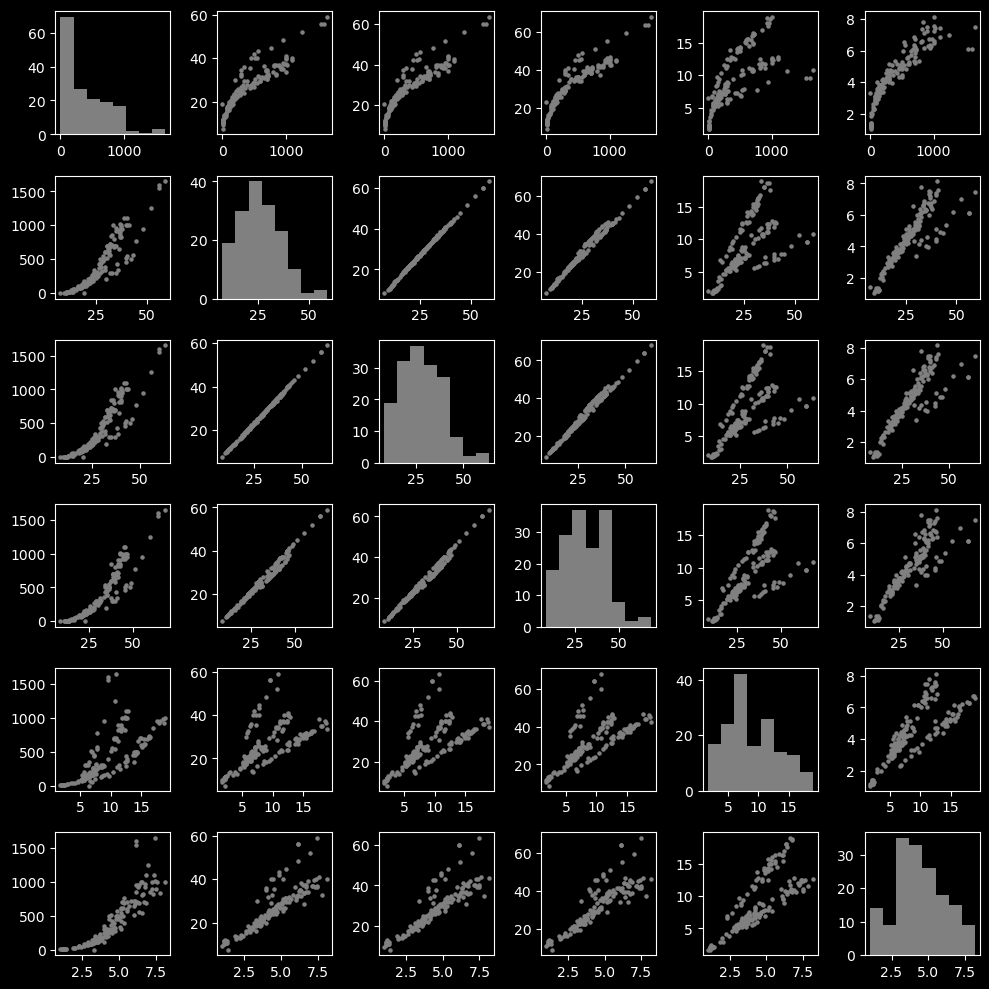

In [13]:
x_s = 6
data = np.c_[y, X]

fig, axes = plt.subplots(nrows=x_s, ncols=x_s, figsize=(10, 10))

for i in range(x_s):
    for j in range(x_s):
        if i == j:
            axes[i, j].hist(data[:, i], bins=8, color='grey')
        else:
            axes[i, j].scatter(data[:, i], data[:, j], c='grey', s=5)

plt.tight_layout()
plt.show()

In [14]:
#you can see that 3 of the plots look almost like the identity function f: x -> x,
#so you could just get rid of one of these columns while loosing almost no information.

In [15]:
#now we add the ones to X for the bias weight w0
#please never run this cell more than once

X = np.c_[np.ones(X.shape[0]), X]
X[0]

array([ 1.  , 23.2 , 25.4 , 30.  , 11.52,  4.02])

In [16]:
weights = np.random.randn(X.shape[1])

e0 = (y[0] - (X[0] @ weights))**2
e0

array([42072.03424612])

In [17]:
def compute_error(X, w, y):
    weights = w
    sum_ = 0
    for obs, y_des in zip(X, y):
        sum_ += (y_des - (obs @ w))**2
    return sum_ / X.shape[0], weights

In [18]:
weights = np.random.randn

In [19]:
#brute force approach to find weights
error_weights = [compute_error(X, weights(X.shape[1]), y) for i in range(10000)]

In [20]:
error, weights_ = [], []
for record in error_weights: 
    error.append(record[0])
    weights_.append(record[1])

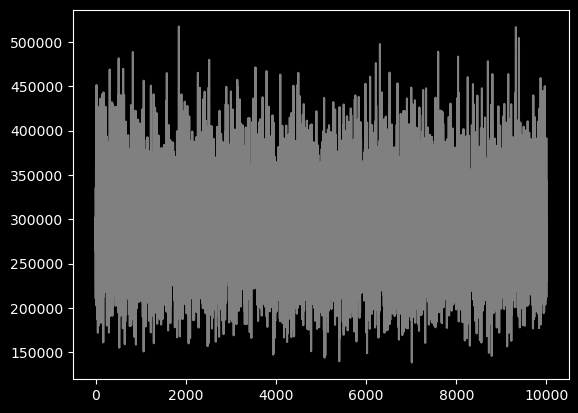

In [21]:
plt.plot(error, color='grey')

In [22]:
min_arg = np.array(error).argmin()

In [23]:
error[min_arg], min(error)

(array([138589.88893995]), array([138589.88893995]))

In [24]:
best_weights = weights_[min_arg]
best_weights

array([0.84357562, 1.04620433, 2.11833563, 2.18766342, 1.85187209,
       0.34621724])

In [25]:
X.shape

(159, 6)

In [34]:
brute_force_solution = compute_error(X, best_weights, y)[0]

In [26]:
for i in range(20):
    print(int(best_weights @ X[i]), y[i])

167 [242.]
174 [290.]
174 [340.]
188 [363.]
189 [430.]
194 [450.]
195 [500.]
194 [390.]
197 [450.]
202 [500.]
203 [475.]
204 [500.]
204 [500.]
208 [340.]
210 [600.]
211 [600.]
215 [700.]
216 [700.]
219 [610.]
217 [650.]


In [27]:
def compute_error(X, w, y):
    weights = w
    sum_ = 0
    for obs, y_des in zip(X, y):
        sum_ += (y_des - (obs @ w))**2
    return sum_ / X.shape[0], weights

$\mathbf{w}= (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}$

In [28]:
X.T.shape, X.shape

((6, 159), (159, 6))

In [29]:
optimal_weights = np.linalg.inv((X.T @ X)) @ X.T @ y
optimal_weights

array([[-499.58695536],
       [  62.35521443],
       [  -6.52675249],
       [ -29.02621861],
       [  28.29735132],
       [  22.47330665]])

In [30]:
for i in range(20):
    print(int(optimal_weights.reshape(6) @ X[i]), y[i])

326 [242.]
369 [290.]
370 [340.]
439 [363.]
444 [430.]
466 [450.]
496 [500.]
473 [390.]
511 [450.]
540 [500.]
536 [475.]
551 [500.]
540 [500.]
556 [340.]
584 [600.]
607 [600.]
608 [700.]
602 [700.]
645 [610.]
629 [650.]


In [31]:
#the best possible solution using the analytic approach still yields a comparatively high error,
#mostly because it is a multivariable problem and the dataset was only 156 observations.
np.sqrt(compute_error(X, optimal_weights, y)[0])

array([120.86305864])

In [35]:
np.sqrt(brute_force_solution)

array([372.27662959])